In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [18]:
df = pd.read_csv("C:/Unified Mentor Private Limited/Amazon_Sales_Project.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Cleaning and Transformation

In [14]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [22]:
# Convert data types (e.g., date columns)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extracting year and month from the order date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year_Month'] = df['Order Date'].dt.to_period('M')

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Year_Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


# Analysing Sales Trends

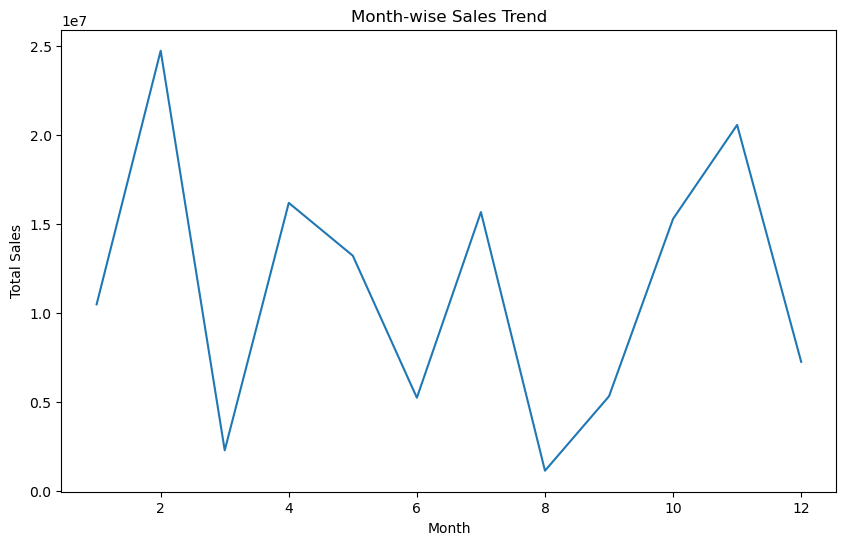

In [24]:
# Group by month and calculate total sales
month_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()

# Plot month-wise sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total Revenue', data=month_sales)
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


# Year wise sales trend

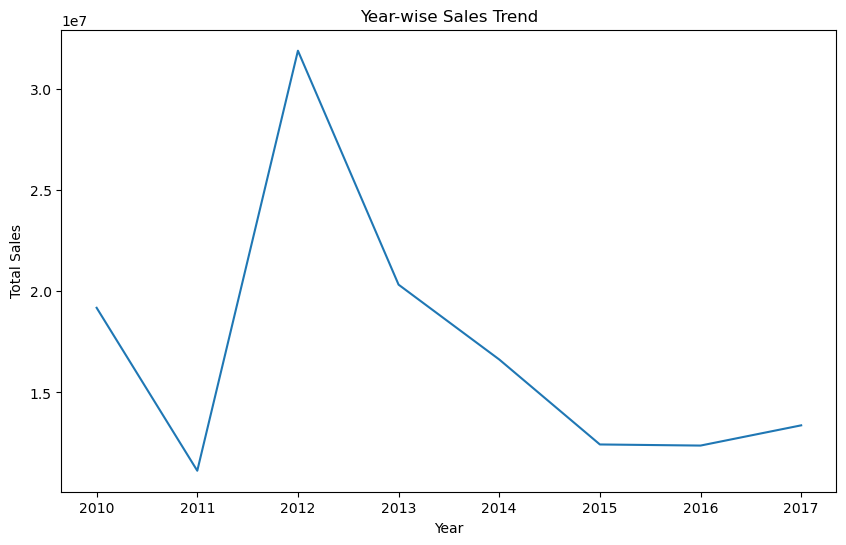

In [31]:
# Group by year and calculate total sales
year_sales = df.groupby('Year')['Total Revenue'].sum().reset_index()

# Plot year-wise sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Revenue', data=year_sales)
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [35]:
df['Total Revenue'].dtype
df['Year_Month'].dtype

period[M]

# Year Month wise 

In [38]:
if pd.api.types.is_period_dtype(df['Year_Month']):
    df['Year_Month'] = df['Year_Month'].astype(str)
    df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')


In [39]:
df['Year_Month'].dtype

dtype('<M8[ns]')

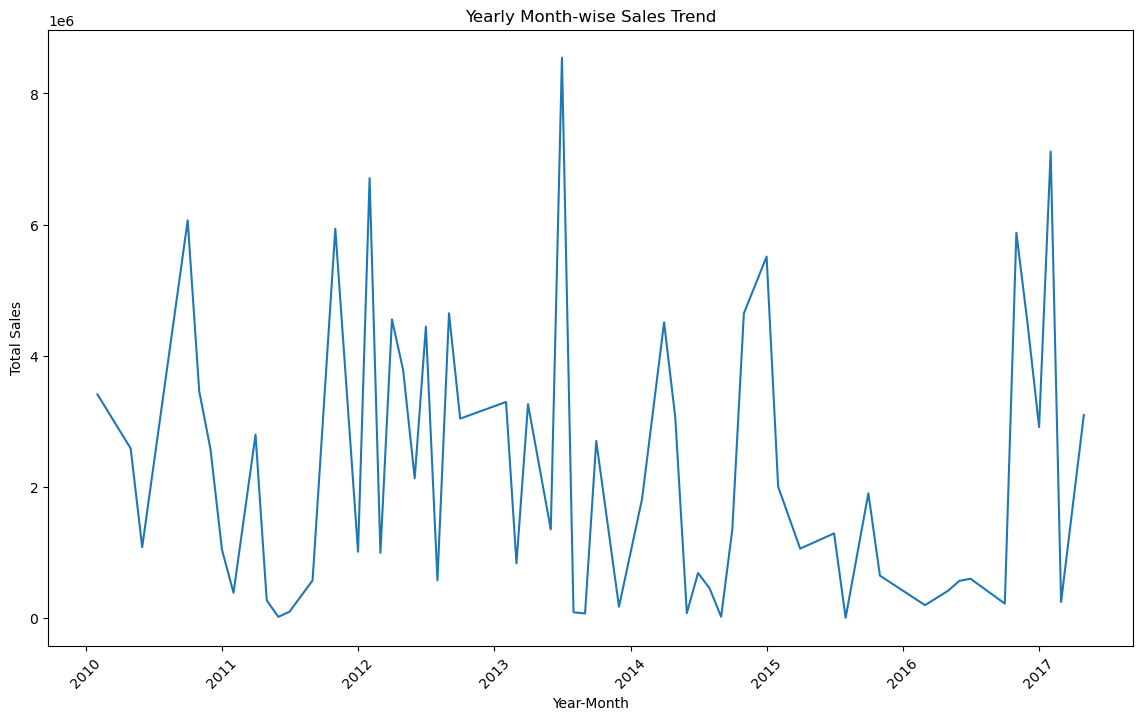

In [40]:
# Group by year and month and calculate total sales
year_month_sales = df.groupby('Year_Month')['Total Revenue'].sum().reset_index()

# Plot yearly month-wise sales trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_Month', y='Total Revenue', data=year_month_sales)
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Key metrics and relationships

Total Sales: $137348768.31
Average Sales per Order: $1373487.6831
Total Orders: 100


C:\Users\HP\AppData\Local\Temp\ipykernel_15992\3916865071.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


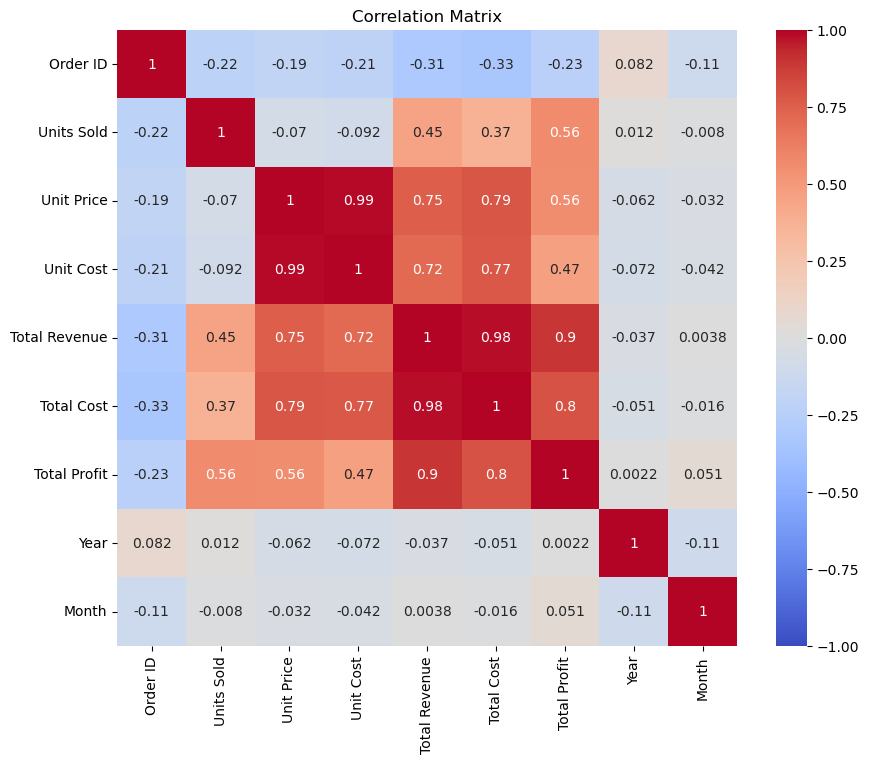

In [42]:
# Key metrics
total_sales = df['Total Revenue'].sum()
average_sales_per_order = df['Total Revenue'].mean()
total_orders = df['Order ID'].nunique()

print(f'Total Sales: ${total_sales}')
print(f'Average Sales per Order: ${average_sales_per_order}')
print(f'Total Orders: {total_orders}')

# Correlation analysis
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# Visualization


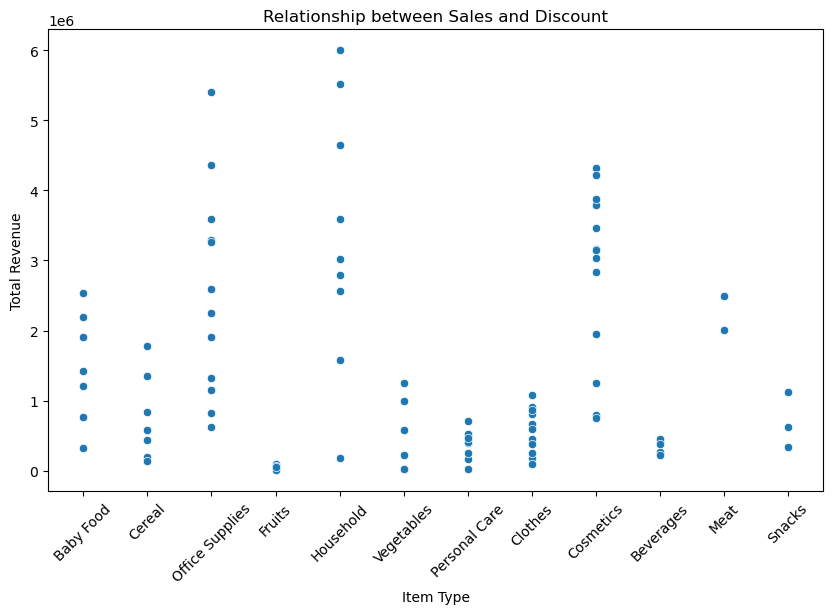

In [46]:
# Relationship between Total Revenue and Item Ty
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item Type', y='Total Revenue', data=df)
plt.title('Relationship between Sales and Discount')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


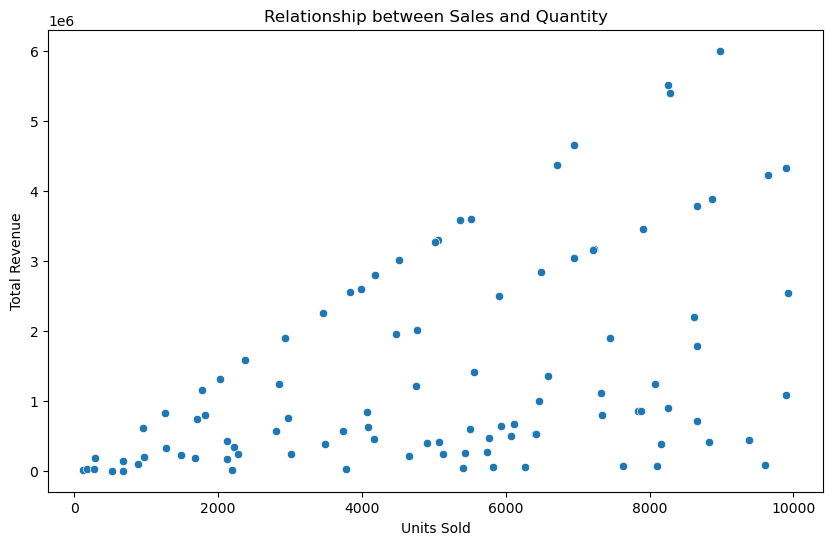

In [47]:
# Relationship between Total Revenue and Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=df)
plt.title('Relationship between Sales and Quantity')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()
